In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('startup_funding.csv')

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [5]:
df.drop(columns=['Remarks'],inplace=True)

In [6]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [7]:
df.set_index('Sr No',inplace=True)

In [8]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'
},inplace=True)

In [9]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [10]:
df['amount'] = df['amount'].fillna('0')

In [11]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [12]:
df = df[df['amount'].str.isdigit()]

In [13]:
df.shape

(3029, 8)

In [14]:
df['amount'] = df['amount'].astype('float')

In [15]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [16]:
def to_inr(dollar):
    inr = dollar * 82.5
    return inr/10000000

In [17]:
df['amount'] = df['amount'].apply(to_inr)

In [18]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [19]:
# trying date to convert in date time format
pd.to_datetime(df['date'])

C:\Users\kkark\AppData\Local\Temp\ipykernel_8212\2156323316.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(df['date'])


ParserError: year 72018 is out of range: 05/072018 present at position 121

In [ ]:
# df['date'] = df['date'].str.replace('05/072018','05/07/2018')

In [20]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')

C:\Users\kkark\AppData\Local\Temp\ipykernel_8212\1838826657.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'],errors='coerce')


In [21]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [22]:
df = df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2821 non-null   datetime64[ns]
 1   startup      2821 non-null   object        
 2   vertical     2821 non-null   object        
 3   subvertical  2077 non-null   object        
 4   city         2821 non-null   object        
 5   investors    2821 non-null   object        
 6   round        2821 non-null   object        
 7   amount       2821 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.4+ KB


## to csv

In [24]:
df.to_csv('startup_cleaned.csv',index=False)

### <mark> csv me convert ke bad datetime auto change ho rhaa do it again </mark>
df['date'] = pd.to_datetime(df['date'],errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2821 non-null   datetime64[ns]
 1   startup      2821 non-null   object        
 2   vertical     2821 non-null   object        
 3   subvertical  2077 non-null   object        
 4   city         2821 non-null   object        
 5   investors    2821 non-null   object        
 6   round        2821 non-null   object        
 7   amount       2821 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.4+ KB


In [27]:
df['investors'].sample(15)

Sr No
846                                 Undisclosed Investors
2204                                      Riqueza Capital
1379                                       Accel Partners
1314    Saama Capital, Raghunandan G, Aprameya Radhakr...
2316                         Sequoia and Kalaari Capital.
215                                               Fairfax
2034          Zodius Capital, Lightspeed Venture Partners
2475                                       VentureNursery
2775                    Arun Chandra Mohan, Praveen Sinha
1480    Fireside Ventures, Investopad, P39 Capital, An...
1970                Lightspeed Venture Partners, K Ganesh
1256                          Menterra Social Impact Fund
2021                                          Ankur Gupta
170                               Fung Strategic Holdings
1930                                 Sixth Sense Ventures
Name: investors, dtype: object

In [28]:
lst = [1,2,3]
lst[0] = 'KK'

del lst[0]

lst

[2, 3]

In [29]:
lst  =sorted(set(df['investors'].str.split(',').sum()))
del lst[0]

lst

[' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investors',
 

In [30]:
df[df['investors'].str.contains(' IDG Ventures')].head()[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.628844
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,181.500000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,45.375000
505,2017-11-21,Heckyl,Technology,Mumbai,Private Equity,22.275000
528,2017-05-10,Little Black Book,Consumer Internet,New Delhi,Private Equity,8.250000


In [31]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Lenskart                 495.000000
CureFit                  206.250000
Bizongo                  181.500000
Curefit                  123.750000
Xpressbees               103.125000
FirstCry.com              82.500000
POPxo                     70.950000
\\xc2\\xa0CloudCherry     49.500000
Sigtuple                  47.850000
RentMojo                  41.250000
Aasaanjobs                41.250000
PlaySimple                33.000000
Tripoto                   29.628844
Active.ai                 24.750000
Heckyl                    22.275000
Little Black Book          8.250000
Cloudcherry Analytics      8.250000
Name: amount, dtype: float64

### stage wala ans

<AxesSubplot: ylabel='amount'>

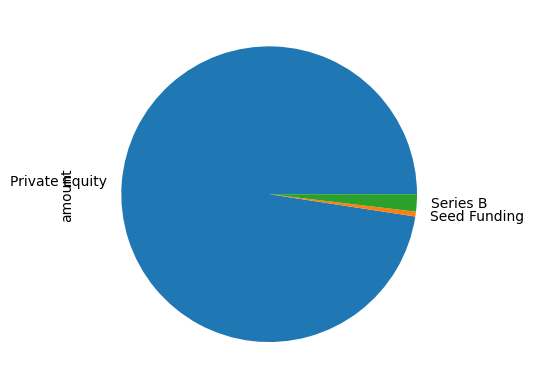

In [32]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('round')['amount'].sum().plot(kind='pie')

<AxesSubplot: ylabel='amount'>

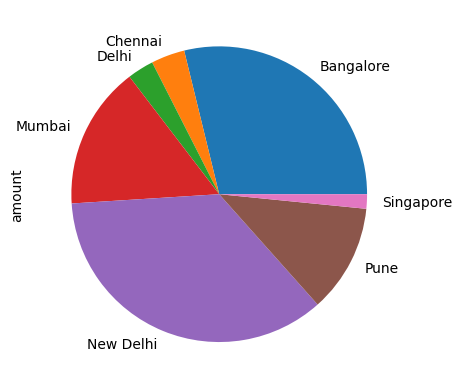

In [33]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('city')['amount'].sum().plot(kind='pie')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2821 non-null   datetime64[ns]
 1   startup      2821 non-null   object        
 2   vertical     2821 non-null   object        
 3   subvertical  2077 non-null   object        
 4   city         2821 non-null   object        
 5   investors    2821 non-null   object        
 6   round        2821 non-null   object        
 7   amount       2821 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.4+ KB


In [35]:
df['year'] = df['date'].dt.year

In [36]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 1 to 2873
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2821 non-null   datetime64[ns]
 1   startup      2821 non-null   object        
 2   vertical     2821 non-null   object        
 3   subvertical  2077 non-null   object        
 4   city         2821 non-null   object        
 5   investors    2821 non-null   object        
 6   round        2821 non-null   object        
 7   amount       2821 non-null   float64       
 8   year         2821 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 220.4+ KB


<AxesSubplot: xlabel='year'>

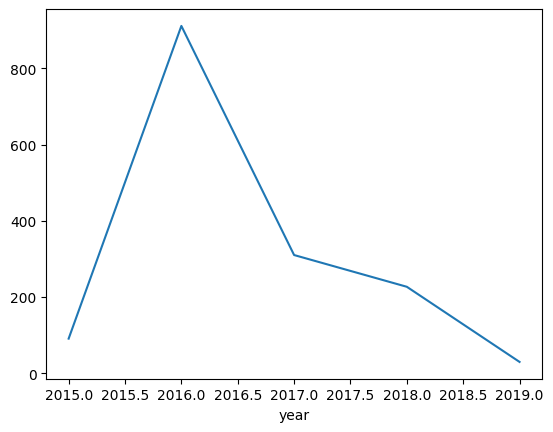

In [38]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('year')['amount'].sum().plot()

## Overall Analysis

In [39]:
round(df['amount'].max())

32175

In [40]:
df[df['amount'] == 32175] 

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,32175.0,2019


In [41]:
df.groupby('startup')['amount'].max().sort_values(ascending = False).head(1).values[0]

32175.0

In [42]:
#on an average indian starup me kinte paise lagte hai
df.groupby('startup')['amount'].sum().mean()

128.9992313593342

In [43]:
df['startup'].nunique()

2298

In [44]:
# adding month to data
df['month'] = df['date'].dt.month

In [45]:
df

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2
...,...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015,4
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015,4
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015,4


In [46]:
df.groupby(['year','month'])['startup'].count().reset_index()

,year,month,startup
0,2015,1,35
1,2015,2,14
2,2015,3,36
3,2015,4,65
4,2015,5,53
...,...,...,...
58,2019,12,10
59,2020,1,2
60,2020,2,2
61,2020,9,2


In [47]:
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()

### year and month ko ek hi colm me jod raheh hai for plotting x and y axis me against amount

In [48]:
temp_df['x_axis'] = temp_df['month'].astype('str') + '-' + temp_df['year'].astype('str')

In [49]:
temp_df[['amount','x_axis']]

,amount,x_axis
0,5274.637500,1-2015
1,1567.178250,2-2015
2,1910.658750,3-2015
3,4511.058750,4-2015
4,1401.427500,5-2015
...,...,...
58,3667.125000,12-2019
59,140.649250,1-2020
60,39.600000,2-2020
61,1801.460595,9-2020


In [50]:
# code for similar investros
temp_df = df[df['investors'].str.contains(' IDG Ventures')]
temp_df
# type(temp_df)
# a =temp_df.values.tolist
# type(a)
# df[temp_df]

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
102,2019-04-13,Tripoto,Social Media,Travel,New Delhi,"Orchid India, Hornbill Orchid India Fund, Chir...",Series B,29.628844,2019,4
259,2018-02-05,Bizongo,Consumer Internet,Aggregator For Packaging Material,Mumbai,"B Capital, International Finance Corporation (...",Private Equity,181.500000,2018,2
310,2018-04-26,POPxo,Technology,Women Focussed Digital Media Platform,Delhi,"Neoplux, OPPO, IDG Ventures India, Kalaari Cap...",Private Equity,45.375000,2018,4
505,2017-11-21,Heckyl,Technology,Big Data Analytics Platform,Mumbai,"Notion Capital, IDG Ventures",Private Equity,22.275000,2017,11
528,2017-05-10,Little Black Book,Consumer Internet,Local Recommendations and Discoveries Platform,New Delhi,"Blume Ventures, IDG Ventures & Indian Angel Ne...",Private Equity,8.250000,2017,5
673,2017-08-29,CureFit,Consumer Internet,End to End health and wellness platform.,Bangalore,"Accel Partners, IDG Ventures, Kalaari Capital,...",Private Equity,206.250000,2017,8
964,2017-03-16,POPxo,Consumer Internet,Digital Media publication for women,New Delhi,"GREE Ventures, Kalaari Capital and IDG Venture...",Private Equity,25.575000,2017,3
1012,2017-02-13,Sigtuple,Technology,Medical Automation platform,Bangalore,"Accel Partners, IDG Ventures, Endiya Partners,...",Private Equity,47.850000,2017,2
1211,2016-11-14,Active.ai,Technology,Banking & Fintech Platform,Singapore,"Kalaari Capital, IDG Ventures India",Private Equity,24.750000,2016,11


In [51]:
df.isin(temp_df)

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2869,False,False,False,False,False,False,False,False,False,False
2870,False,False,False,False,False,False,False,False,False,False
2871,False,False,False,False,False,False,False,False,False,False


In [52]:
# df['vertical']

In [53]:
# df['vertical'].isin(['E-Tech','FinTech'])

In [54]:
for i in set(df[df["investors"].str.contains('IDG Ventures')].sample(5)['investors'].str.split(',').sum()):
    print(i)

 International Finance Corporation (IFC)
 Lasmer NV
B Capital
Aspada Advisors
 Kalaari Capital and Others
 Kalaari Capital
 3one4 Capital
\\xc2\\xa0 UC-RNT fund
 Chiratae Ventures (formerly IDG Ventures)
 Accel Partners and IDG Ventures
 Accel Partners
IDG Ventures
\\xc2\\xa0 Inventus Capital
Accel Partners
 IDG Ventures
Orchid India
 Hornbill Orchid India Fund


In [55]:
df.shape

(2821, 10)

In [56]:
df['vertical'].nunique()

798

In [57]:
temp_df = df.groupby('vertical')['amount'].count().sort_values(ascending=False).head(5)
temp_df

vertical
Consumer Internet    927
Technology           476
eCommerce            186
Healthcare            69
ECommerce             61
Name: amount, dtype: int64

In [58]:
df[df['vertical'].isin(['Consumer Internet','Technology','eCommerce','Healthcare', 'Ecommerce'])].groupby('vertical')['amount'].sum().sort_values(ascending=False)

vertical
Consumer Internet    51501.795955
eCommerce            41270.897250
Technology           18393.027923
Healthcare            3136.798500
Ecommerce             2312.475000
Name: amount, dtype: float64

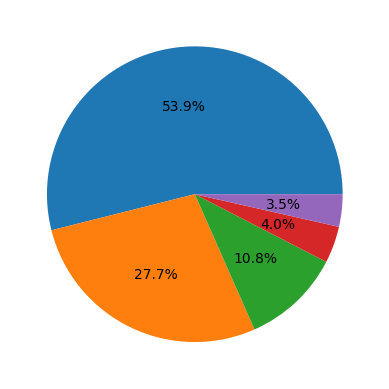

In [59]:
import matplotlib.pyplot as plt
temp_df = df.groupby('vertical')['amount'].count().sort_values(ascending=False).head(5)
temp_df

plt.pie(temp_df,autopct='%0.1f%%')
plt.show()

In [60]:
temp_df = df.groupby('vertical')['amount'].sum().sort_values(ascending=False).head(5)
temp_df

vertical
Consumer Internet    51501.795955
eCommerce            41270.897250
Transportation       32312.217250
Technology           18393.027923
ECommerce            15500.080266
Name: amount, dtype: float64

## type of funding

In [72]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2


## city wise funding

In [73]:
df['city'].nunique()

104

In [70]:
# temp_df = df.groupby('city')['amount'].sum().sort_values(ascending=False).head(10).reset_index(inplace=True)

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

In [71]:
# temp_df[temp_df['amount']>0]

KeyError: 'amount'

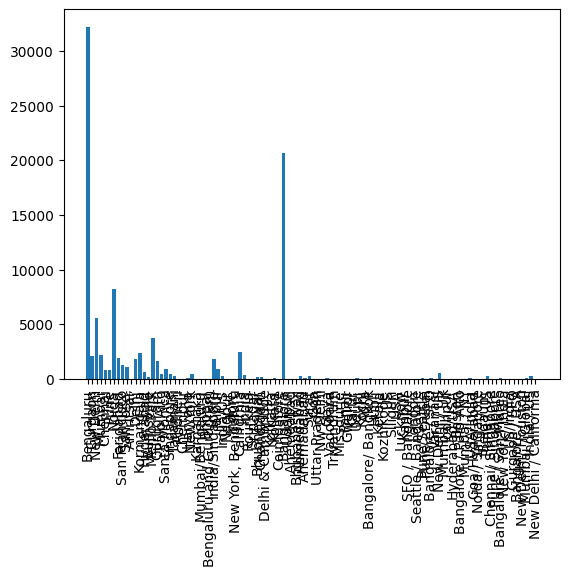

In [74]:
plt.bar(df['city'], df['amount'])
plt.xticks(rotation=90)
plt.show()

## top startup  yearwise and overall

In [75]:
df['date'] =pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month                  #adding one more col on data
df['year'] = df['date'].dt.year

In [76]:
df

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2
...,...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015,4
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015,4
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015,4


In [77]:
df.groupby('year')[['startup','amount']].max()

,startup,amount
year,,
2015,trueHb,5775.0
2016,vPhrase Analytics,1650.0
2017,wayForward,20625.0
2018,zippserv,2475.0
2019,eBikeGo,32175.0
2020,https://www.wealthbucket.in/,1650.0


In [78]:
df.groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Flipkart            33492.5250
Rapido Bike Taxi    32175.0000
Paytm               25978.8375
Ola                  8122.1250
Udaan                7177.5000
                       ...    
Scienaptic              0.0000
Gaana.com               0.0000
GIBSS                   0.0000
ScoutMyTrip             0.0000
MSM Box                 0.0000
Name: amount, Length: 2298, dtype: float64

## top investros



In [79]:
df['investors'].str.split(',')

Sr No
1                               [Tiger Global Management]
2                             [Susquehanna Growth Equity]
3                                 [Sequoia Capital India]
4                                        [Vinod Khatumal]
5                               [Sprout Venture Partners]
                              ...                        
2869                                      [SAIF Partners]
2870    [Sumit Jain,  Aprameya Radhakrishna,  Alok Goe...
2871                                         [Rainmatter]
2872                                        [The HR Fund]
2873          [Bessemer Venture Partners,  SAIF Partners]
Name: investors, Length: 2821, dtype: object

In [80]:
df.groupby('investors')['amount'].sum().sort_values(ascending=False).head()

investors
Westbridge Capital                   32175.0000
Softbank                             20625.0000
SoftBank Group                       12061.5000
Microsoft, eBay, Tencent Holdings    11550.0000
Vijay Shekhar Sharma                  8251.2375
Name: amount, dtype: float64

## top investors

In [81]:
pd.read_csv('startup_cleaned.csv')

,date,startup,vertical,subvertical,city,investors,round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2816,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
2817,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2818,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000
2819,2015-04-29,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,4.125000


In [82]:
df.shape

(2821, 10)

In [83]:
df['startup'].nunique()

2298

In [84]:
temp_df = df.groupby('startup')[['amount','year']].sum()

In [85]:
temp_df

,amount,year
startup,,
"""BYJU\\'S""",1237.500,2019
121Policy,0.000,2016
19th mile,1.485,2018
1Crowd,0.000,2017
1mg,330.000,8067
...,...,...
underDOGS,0.000,2016
vImmune,0.000,2016
vPhrase Analytics,0.000,2016


In [86]:
matrix = df.pivot_table(index='year', values='amount', aggfunc='sum')
matrix

,amount
year,
2015,60422.389500
2016,31581.297891
2017,86019.530273
2018,37183.017449
2019,78014.788706
2020,3219.209846


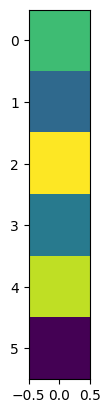

In [87]:
plt.imshow(matrix)

In [88]:
### funding heatmap
# pd.pivot_table(data=df, index='date', columns='subvertical', values='amount').head(50)

df.pivot_table(index='year', columns='city', values='amount')

city,Agra,Ahemadabad,Ahemdabad,Ahmedabad,Amritsar,Andheri,Bangalore,Bangalore / Palo Alto,Bangalore / SFO,Bangalore / San Mateo,...,Trivandrum,US,US/India,USA,USA/India,Udaipur,Udupi,Uttar Pradesh,Vadodara,Varanasi
year,,,,,,,,,,,,,,,,,,,,,
2015,NaN,NaN,NaN,23.401125,NaN,NaN,123.548482,8.25,14.850,66.0,...,NaN,NaN,24.75,NaN,136.95,0.000,99.0,NaN,11.41250,NaN
2016,0.0,NaN,NaN,17.128375,NaN,NaN,29.833985,NaN,111.375,NaN,...,0.825,0.0,NaN,0.0,NaN,NaN,NaN,NaN,3.11850,0.429
2017,NaN,NaN,NaN,44.550000,NaN,NaN,281.665083,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.02775,NaN
2018,NaN,51.3975,0.0,19.387500,NaN,NaN,51.562500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.125,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,2.475,47.4375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2
...,...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015,4
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015,4
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015,4


## Startup/Company

In [102]:
# df= pd.read_csv("E:\DataScienceCampus_ineuron\Projects\Stremlit-dashboard\Indian-startup-project\startup_cleaned.csv")

In [114]:
df

,date,startup,vertical,subvertical,city,investors,round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2816,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
2817,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2818,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000
2819,2015-04-29,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,4.125000


In [117]:
df_temp=df.set_index('startup')
df_temp

,date,vertical,subvertical,city,investors,round,amount
startup,,,,,,,
BYJU’S,2020-09-01,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
Shuttl,2020-01-13,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
Mamaearth,2020-09-01,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
https://www.wealthbucket.in/,2020-02-01,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
Fashor,2020-02-01,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...
Tracxn,2015-04-29,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
Dazo,2015-04-29,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
Tradelab,2015-04-29,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000


In [124]:
df_temp[df_temp.index == "Mamaearth"][['vertical', 'subvertical', 'city']]

,vertical,subvertical,city
startup,,,
Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru


In [126]:
df

,date,startup,vertical,subvertical,city,investors,round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2816,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
2817,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2818,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000
2819,2015-04-29,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,4.125000


In [164]:
df.tail()

,date,startup,vertical,subvertical,city,investors,round,amount
2816,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875
2817,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000
2818,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300
2819,2015-04-29,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,4.125
2820,2015-04-29,Travel Triangle,Online Travel Marketplace,NaN,Noida,"Bessemer Venture Partners, SAIF Partners",Private Equity,66.000


### similar investor

In [214]:
df[['investors','startup']].head(1)

,investors,startup
0,Tiger Global Management,BYJU’S


In [225]:
temp_df = df[df['startup'] =="Dazo"]['investors'].values[0].split(",")
temp_df

['Sumit Jain',
 ' Aprameya Radhakrishna',
 ' Alok Goel',
 ' Rajan Anandan',
 ' Amit Agrawal',
 ' Vinay Goel',
 ' Gaurav Munjal',
 ' Ashish Dev Kapur']

In [218]:
try:
    temp_df2 = df[df['startup'] =="Dazo"]['investors'].values[0].split(",")
except:
    temp_df2 = df[df['startup'] =="Dazo"]['investors'].values[0]

In [227]:
df[df['investors'].str.contains(str(temp_df2))][['startup','vertical', 'subvertical','investors']]

,startup,vertical,subvertical,investors
0,BYJU’S,E-Tech,E-learning,Tiger Global Management
1,Shuttl,Transportation,App based shuttle service,Susquehanna Growth Equity
2,Mamaearth,E-commerce,Retailer of baby and toddler products,Sequoia Capital India
3,https://www.wealthbucket.in/,FinTech,Online Investment,Vinod Khatumal
4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Sprout Venture Partners
...,...,...,...,...
2816,Tracxn,Startup Analytics platform,NaN,SAIF Partners
2817,Dazo,Mobile Food Ordering app,NaN,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ..."
2818,Tradelab,Financial Markets Software,NaN,Rainmatter
2819,PiQube,Hiring Analytics platform,NaN,The HR Fund


In [215]:
df

,date,startup,vertical,subvertical,city,investors,round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2816,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
2817,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2818,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000
2819,2015-04-29,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,4.125000


In [ ]:
j################investor

In [ ]:
df[df['investors'] =="1mg"]['investors'].values[0].split(",")

In [216]:
df

,date,startup,vertical,subvertical,city,investors,round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2816,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
2817,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2818,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000
2819,2015-04-29,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,4.125000


In [152]:
df['city'].isin(['Mumbai'])

0       False
1       False
2       False
3       False
4        True
        ...  
2816    False
2817    False
2818    False
2819    False
2820    False
Name: city, Length: 2821, dtype: bool

In [136]:
df

,date,startup,vertical,subvertical,city,investors,round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2816,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
2817,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2818,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000
2819,2015-04-29,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,4.125000


In [3]:
df=pd.read_csv('startup_cleaned.csv')
df

,date,startup,vertical,subvertical,city,investors,round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2816,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
2817,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2818,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000
2819,2015-04-29,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,4.125000


In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821 entries, 0 to 2820
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2821 non-null   datetime64[ns]
 1   startup      2821 non-null   object        
 2   vertical     2821 non-null   object        
 3   subvertical  2077 non-null   object        
 4   city         2821 non-null   object        
 5   investors    2821 non-null   object        
 6   round        2821 non-null   object        
 7   amount       2821 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 176.4+ KB


In [13]:
df['date'] =pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month                  #adding one more col on data
df['year'] = df['date'].dt.year

In [20]:
df['year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015], dtype=int64)

In [34]:
df[df['year'] == '2015']

,date,startup,vertical,subvertical,city,investors,round,amount,month,year


<AxesSubplot: ylabel='amount'>

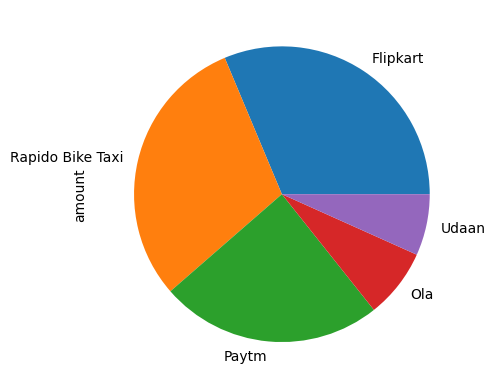

In [28]:
df.groupby('startup')['amount'].sum().sort_values(ascending=False).head().plot(kind='pie')

In [47]:
df[df['year'] == 2015].groupby('startup')['amount'].sum().sort_values(ascending=False).head(5)

startup
Flipkart.com    5775.0
Paytm           5610.0
Ola             4125.0
Snapdeal        4125.0
Olacabs         3300.0
Name: amount, dtype: float64

In [35]:
temp_df=df.groupby('year')[['startup','amount']].max().head()
temp_df

,startup,amount
year,,
2015,trueHb,5775.0
2016,vPhrase Analytics,1650.0
2017,wayForward,20625.0
2018,zippserv,2475.0
2019,eBikeGo,32175.0


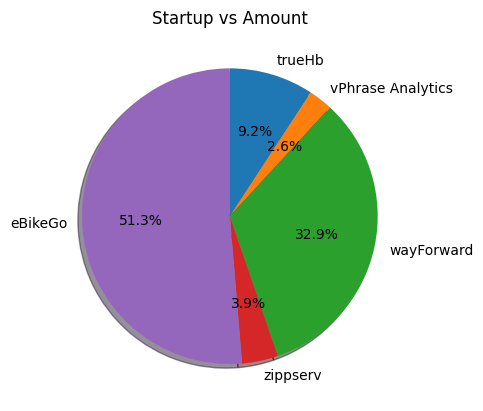

In [31]:
import matplotlib.pyplot as plt

# Data
labels = ['trueHb', 'vPhrase Analytics', 'wayForward', 'zippserv', 'eBikeGo']
amounts = [5775.0, 1650.0, 20625.0, 2475.0, 32175.0]

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(amounts, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True)

# Adding title and displaying the plot
plt.title("Startup vs Amount")
plt.show()


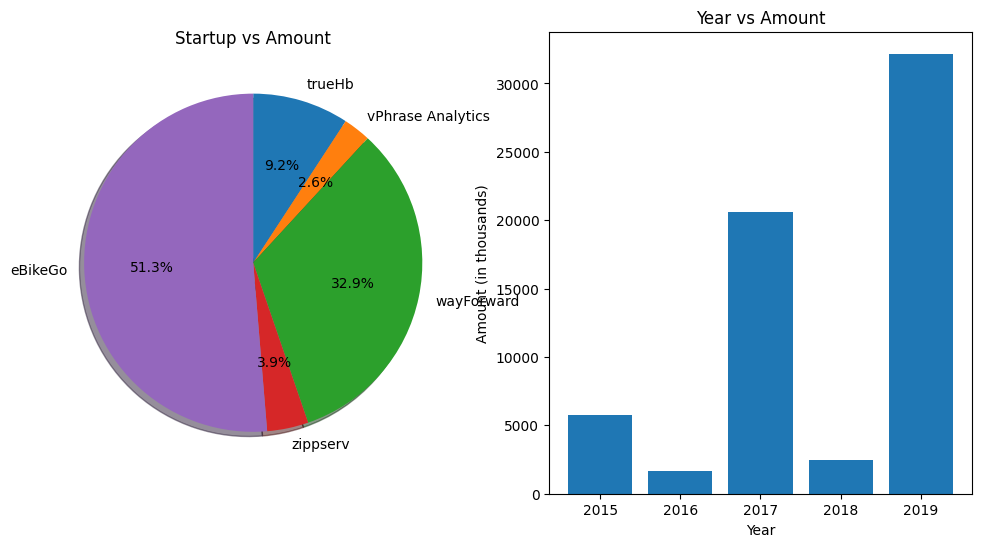

In [32]:
import matplotlib.pyplot as plt

# Data
years = [2015, 2016, 2017, 2018, 2019]
labels = ['trueHb', 'vPhrase Analytics', 'wayForward', 'zippserv', 'eBikeGo']
amounts = [5775.0, 1650.0, 20625.0, 2475.0, 32175.0]

# Plotting the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(amounts, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True)
ax1.set_title("Startup vs Amount")

# Plotting the bar chart
ax2.bar(years, amounts)
ax2.set_xlabel("Year")
ax2.set_ylabel("Amount (in thousands)")
ax2.set_title("Year vs Amount")

# Displaying the plot
plt.show()
